# GROMACS large benchmark performance

## Setup section

Import the required modules and define basic functions for reading the data from GROMACS output files and analysing it.

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from appanalysis import gromacs

## Setup results files

In [24]:
archercpn = 24
archerfiles = {4:'../large/results/ARCHER/nc2-cubic-md_4nodes_201711212001.log',
    8:'../large/results/ARCHER/nc2-cubic-md_8nodes_201711211932.log',
    16:'../large/results/ARCHER/nc2-cubic-md_16nodes_201711160216.log',
               32:'../large/results/ARCHER/nc2-cubic-md_32nodes_201711140119.log',
               64:'../large/results/ARCHER/nc2-cubic-md_64nodes_201711142033.log',
               128:'../large/results/ARCHER/nc2-cubic-md_128nodes_201711150053.log',
               256:'../large/results/ARCHER/nc2-cubic-md_256nodes_201711150622.log'}

In [25]:
cirruscpn = 36
cirrusfiles = {4:'../large/results/Cirrus/GromacsBench_4nodes_cirrus.log',
               8:'../large/results/Cirrus/GromacsBench_8nodes_cirrus.log',
               16:'../large/results/Cirrus/GromacsBench_16nodes_cirrus.log',
               35:'../large/results/Cirrus/GromacsBench_35nodes_cirrus.log',
               64:'../large/results/Cirrus/GromacsBench_64nodes_cirrus.log',
               70:'../large/results/Cirrus/GromacsBench_70nodes_cirrus.log',
               135:'../large/results/Cirrus/GromacsBench_135nodes_cirrus.log',
               270:'../large/results/Cirrus/GromacsBench_270nodes_cirrus.log'
               }

In [26]:
athenacpn = 28
athenafiles = {2:'../large/results/Athena/nc2-cubic-md_2nodes_201710061035.log',
               4:'../large/results/Athena/nc2-cubic-md_4nodes_201710051544.log',
               8:'../large/results/Athena/nc2-cubic-md_8nodes_201709271022.log',
               16:'../large/results/Athena/nc2-cubic-md_16nodes_201710061242.log',
               32:'../large/results/Athena/nc2-cubic-md_32nodes_201801191044.log'
               }

In [27]:
thomascpn = 24
thomasfiles = {2:'../large/results/Thomas/nc2-cubic-md_2nodes_201710060907.log',
               4:'../large/results/Thomas/nc2-cubic-md_4nodes_201710061013.log',
               8:'../large/results/Thomas/nc2-cubic-md_8nodes_201710061118.log',
               16:'../large/results/Thomas/nc2-cubic-md_16nodes_201710062042.log'
               }

In [28]:
csd3scpn = 32
csd3sfiles = {2:'../large/results/CSD3Skylake/nc2-cubic-md_2nodes_201712010921.log',
              4:'../large/results/CSD3Skylake/nc2-cubic-md_4nodes_201711301547.log',
              8:'../large/results/CSD3Skylake/nc2-cubic-md_8nodes_201712010955.log',
              16:'../large/results/CSD3Skylake/nc2-cubic-md_16nodes_201711301527.log',
              32:'../large/results/CSD3Skylake/nc2-cubic-md_32nodes_201711301537.log'
               }

## Process data

In [29]:
archercores, archerperf, archersu = gromacs.calcperf(archerfiles, archercpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              4              96           0.085            1.00
              8             192           0.140            1.65
             16             384           0.243            2.86
             32             768           0.406            4.78
             64            1536           0.631            7.42
            128            3072           0.826            9.72
            256            6144           0.885           10.41


In [30]:
cirruscores, cirrusperf, cirrussu = gromacs.calcperf(cirrusfiles, cirruscpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              4             144           0.118            1.00
              8             288           0.210            1.78
             16             576           0.349            2.96
             35            1260           0.532            4.51
             64            2304           0.647            5.48
             70            2520           0.684            5.80
            135            4860           0.679            5.75
            270            9720           0.819            6.94


In [31]:
athenacores, athenaperf, athenasu = gromacs.calcperf(athenafiles, athenacpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              2              56           0.060            1.00
              4             112           0.110            1.83
              8             224           0.211            3.52
             16             448           0.355            5.92
             32             896           0.566            9.43


In [32]:
thomascores, thomasperf, thomassu = gromacs.calcperf(thomasfiles, thomascpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              2              48           0.057            1.00
              4              96           0.106            1.86
              8             192           0.191            3.35
             16             384           0.324            5.68


In [33]:
csd3scores, csd3sperf, csd3ssu = gromacs.calcperf(csd3sfiles, csd3scpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              2              64           0.108            1.00
              4             128           0.198            1.83
              8             256           0.327            3.03
             16             512           0.513            4.75
             32            1024           0.777            7.19


## Performance comparison

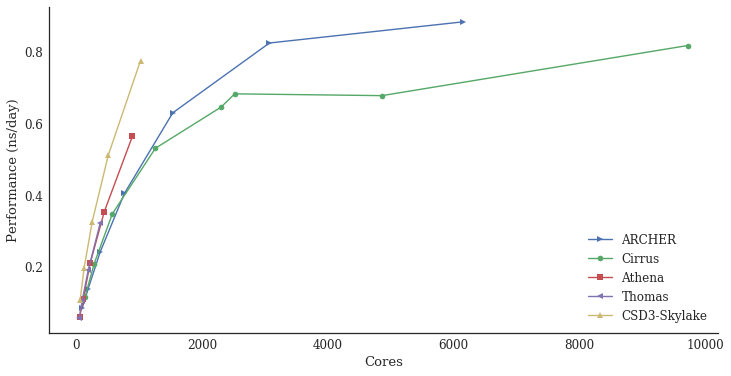

In [34]:
plt.plot(archercores, archerperf, '>-', label='ARCHER')
plt.plot(cirruscores, cirrusperf, 'o-', label='Cirrus')
plt.plot(athenacores, athenaperf, 's-', label='Athena')
plt.plot(thomascores, thomasperf, '<-', label='Thomas')
plt.plot(csd3scores, csd3sperf, '^-', label='CSD3-Skylake')
plt.xlabel('Cores')
plt.ylabel('Performance (ns/day)')
plt.legend(loc='best')
sns.despine()

Zoom in on low core count region

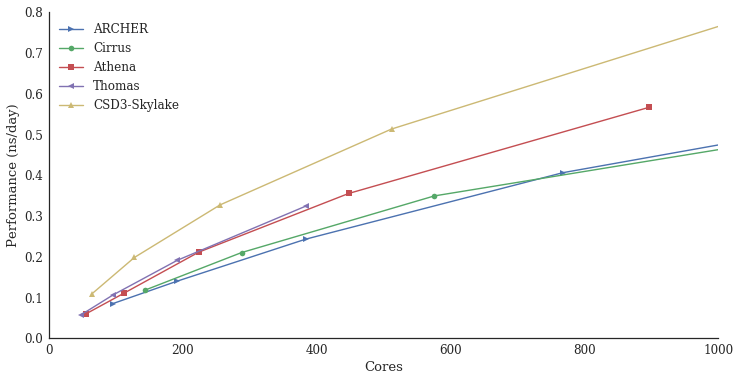

In [35]:
plt.xlim([0,1000])
plt.ylim([0,0.8])
plt.plot(archercores, archerperf, '>-', label='ARCHER')
plt.plot(cirruscores, cirrusperf, 'o-', label='Cirrus')
plt.plot(athenacores, athenaperf, 's-', label='Athena')
plt.plot(thomascores, thomasperf, '<-', label='Thomas')
plt.plot(csd3scores, csd3sperf, '^-', label='CSD3-Skylake')
plt.xlabel('Cores')
plt.ylabel('Performance (ns/day)')
plt.legend(loc='best')
sns.despine()
plt.savefig('gromacs_large_perf.png', dpi=300)

## 16 node performance comparisons

16 nodes is the smallest common number of nodes across all the systems.

In [18]:
nperf = {}
cperf = {}
nperf['ARCHER'] = archerperf[0]
cperf['ARCHER'] = archerperf[0]/(archercpn)
nperf['Cirrus'] = cirrusperf[2]
cperf['Cirrus'] = cirrusperf[2]/(cirruscpn)
nperf['Thomas'] = thomasperf[3]
cperf['Thomas'] = thomasperf[3]/(thomascpn)
nperf['Athena'] = athenaperf[3]
cperf['Athena'] = athenaperf[3]/(athenacpn)
nperf['CSD3 Skylake'] = csd3sperf[1]
cperf['CSD3 Skylake'] = csd3sperf[1]/(csd3scpn)

print("Performance improvement relative to ARCHER:\n")
print("{:>15s} {:>15s} {:>15s}".format('System', 'Perf (ns/day)', 'Improvement'))
print("{:>15s} {:>15s} {:>15s}".format('======', '=============', '==========='))
print("16-nodes")
for system in nperf:
    print("{:>15s} {:>15.3f} {:>15.3f}".format(system, nperf[system], nperf['ARCHER']/nperf[system]))

print("per-core")
for system in cperf:
    print("{:>15s} {:>15.3f} {:>15.3f}".format(system, cperf[system], cperf['ARCHER']/cperf[system]))

Performance improvement relative to ARCHER:

         System   Perf (ns/day)     Improvement
         ======   =============     ===========
16-nodes
         ARCHER           0.243           1.000
         Cirrus           0.349           0.696
         Thomas           0.324           0.750
         Athena           0.355           0.685
   CSD3 Skylake           0.198           1.227
per-core
         ARCHER           0.010           1.000
         Cirrus           0.010           1.044
         Thomas           0.013           0.750
         Athena           0.013           0.799
   CSD3 Skylake           0.006           1.636
